

# Project: Investigate TMDb Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. A successful movie is evaluated by its popularity, vote average score(Ratings) and revenue. There are some keys that can affect the success of a movie. For example, the Budget, Cast, Director, Tagline Keywords, Runtime, Genres, Production Companies, Release Date, Vote Average, etc

>These are the questions that I choose so that I can be able to explore over the course of the report. 

   + Which genres are most popular from year to year?
   + Which year has the highest release of movies?
   + Did movies with higher vote count received a better rating?
   + What is the difference between the distribution of movies revenues and budget from year to year?


In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Load your data and print out a few lines.
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#Perform operations to inspect data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

>We have 10866 rows and 21 columns, we have different datatypes such as int, float, and string. Howver as you can see that some the columns contain null values, so lets see specifically how many null values per column.

In [5]:
list(df.isnull().sum().items())

[('id', 0),
 ('imdb_id', 10),
 ('popularity', 0),
 ('budget', 0),
 ('revenue', 0),
 ('original_title', 0),
 ('cast', 76),
 ('homepage', 7930),
 ('director', 44),
 ('tagline', 2824),
 ('keywords', 1493),
 ('overview', 4),
 ('runtime', 0),
 ('genres', 23),
 ('production_companies', 1030),
 ('release_date', 0),
 ('vote_count', 0),
 ('vote_average', 0),
 ('release_year', 0),
 ('budget_adj', 0),
 ('revenue_adj', 0)]

>Looking at the result above, we see that the colums that have null values are cast, homepage, director, tagline, keywodds, overview, genres, production companies. We also see that homepage, tagline, keywords and production_companies have a lot of null records. I decided to remove  tagline and keywords since they have a lot of null values and I won't even need them depending on my questions.

>Let's try to get more descriptive information from the dataset


### Data Cleaning 
While cleaning my data I am going to;
* Remove some columns with a lot of null values and unnecessary ones for answering the questions : homepage, tagline, imdb_id, overview, budget_adj, revenue_adj.
* Remove duplicated data
* Remove all null values in the columns that have null values
* Replace zero values with null values in the column that has null values.
* Clean columns that contain multiple data such as cast, keywords, director, genres, production_companies by separating their data.


In [6]:
#Replace zero values with null values
df['revenue_adj'].replace(0, np.NAN, inplace=True)
df['revenue'].replace(0, np.NAN, inplace=True)
df['budget_adj'].replace(0, np.NAN, inplace=True)
df['budget'].replace(0, np.NAN, inplace=True)
df['runtime'].replace(0, np.NAN, inplace=True)

#Remove all null values in the columns that have null values

df.dropna(axis=0, inplace=True)

In [7]:
df[df.isna() == True].shape

(1287, 21)

In [8]:
"""Seperating columns with several values, split by an '|', into as many columns as needed"""


df_c = (df['cast'].str.split('|', expand=True).rename(columns=lambda x: f"cast_{x+1}"))
df_d = (df['director'].str.split('|', expand=True).rename(columns=lambda x: f"director_{x+1}"))
df_k = (df['keywords'].str.split('|', expand=True).rename(columns=lambda x: f"keywords_{x+1}"))
df_g = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))
df_p = (df['production_companies'].str.split('|', expand=True).rename(columns=lambda x: f"production_companies_{x+1}"))

In [9]:
df_d.head()

,director_1,director_2,director_3,director_4,director_5,director_6
0,Colin Trevorrow,None,None,None,None,None
1,George Miller,None,None,None,None,None
2,Robert Schwentke,None,None,None,None,None
3,J.J. Abrams,None,None,None,None,None
4,James Wan,None,None,None,None,None


In [10]:
# Joining the columns
df = df.join([df_c, df_d, df_k, df_g, df_p])

In [11]:
# Drop all unwanted columns
df = df.drop(['cast', 'keywords', 'director', 'genres', 'production_companies', 'imdb_id', 'homepage', 'overview', 'release_date', 'tagline'], axis=1)

In [12]:
#remove duplicates
df.drop_duplicates(inplace=True)

In [13]:
df.dtypes

id                          int64
popularity                float64
budget                    float64
revenue                   float64
original_title             object
runtime                   float64
vote_count                  int64
vote_average              float64
release_year                int64
budget_adj                float64
revenue_adj               float64
cast_1                     object
cast_2                     object
cast_3                     object
cast_4                     object
cast_5                     object
director_1                 object
director_2                 object
director_3                 object
director_4                 object
director_5                 object
director_6                 object
keywords_1                 object
keywords_2                 object
keywords_3                 object
keywords_4                 object
keywords_5                 object
genres_1                   object
genres_2                   object
genres_3      

>So far the data looks prepared for the analysis, no duplicates , columns containing multiple values have been seperated and data types look ready for analysis. Next, I am going to use queries to have a deeper look, if some double entries are in specific columns.

In [14]:
df['original_title'].value_counts().head(10)


Halloween               2
The Three Musketeers    2
Wanted                  2
The Thing               2
Halloween II            2
Clash of the Titans     2
The Fog                 2
Jurassic World          1
The Conjuring           1
Riddick                 1
Name: original_title, dtype: int64

>Since the value_counts() in the title column showed that there may be double entries of movie names, I created a function "double_title"  to have a deeper look in the rows with same movie title.

In [15]:
# Checking column for dubplicated original_title
limit_4_title = df['original_title'].value_counts().index.tolist()
limit_4_title = limit_4_title[:4]
limit_4_title

limit_4_id = df['original_title'].value_counts().index.tolist()

def double_title(names):
    for limit in limit_4_title:
        df_title = df[df['original_title'] == limit]
        print(df_title.iloc[:,:5])
        print("---------------------------------------------------------------------")
        
double_title(limit_4_title)

         id  popularity      budget     revenue original_title
7483   2082    0.809646  15000000.0  80253908.0      Halloween
10759   948    1.198849    300000.0  70000000.0      Halloween
---------------------------------------------------------------------
          id  popularity      budget      revenue        original_title
3425   52451    1.407986  75000000.0  132274484.0  The Three Musketeers
10251  10057    0.794564  30000000.0   53898845.0  The Three Musketeers
---------------------------------------------------------------------
         id  popularity      budget      revenue original_title
1733  22717    0.278387        75.0        134.0         Wanted
2893   8909    1.982998  75000000.0  258270008.0         Wanted
---------------------------------------------------------------------
         id  popularity      budget     revenue original_title
3472  60935    1.013771  35000000.0  28128670.0      The Thing
8890   1091    2.355353  10000000.0  13782838.0      The Thing
----

In [16]:
df.shape

(1287, 37)

>After all the operations the final cleaned dataset has 1287 records along with 37 features

In [17]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1287.000000,1287.000000,1.287000e+03,1.287000e+03,1287.000000,1287.000000,1287.000000,1287.000000,1.287000e+03,1.287000e+03
mean,52557.491064,1.786022,5.200349e+07,1.762444e+08,110.273504,947.266511,6.279487,2007.017094,5.462994e+07,1.991775e+08
std,74450.077163,2.172137,5.514540e+07,2.538156e+08,18.811369,1255.476215,0.795955,8.060503,5.525463e+07,2.968515e+08
min,11.000000,0.010335,1.000000e+00,4.300000e+01,63.000000,10.000000,2.200000,1961.000000,9.693980e-01,4.300000e+01
25%,5851.500000,0.664783,1.400000e+07,2.565097e+07,97.000000,179.000000,5.800000,2005.000000,1.519180e+07,2.764890e+07
50%,20178.000000,1.152354,3.200000e+07,8.208716e+07,107.000000,439.000000,6.300000,2009.000000,3.556927e+07,8.674770e+07
75%,62209.500000,2.125342,7.000000e+07,2.140694e+08,121.000000,1173.000000,6.800000,2011.000000,7.630125e+07,2.351178e+08
max,333348.000000,32.985763,4.250000e+08,2.781506e+09,201.000000,9767.000000,8.300000,2015.000000,4.250000e+08,2.827124e+09


>You can see that after the cleaning, the data looks better now and their minimun valuemakes sense.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Which genres are most popular from year to year?(Genre with the highest release and genre the highest votes)

In [18]:
df_genres = df.loc[:, 'genres_1': 'genres_5' ]
df_genres_dates = df_genres.join(df['release_year'])

In [19]:
years = df_genres_dates['release_year'].unique() #creates an array of years mentioned in release year 
most_common = [] #creates a list of tuples for most common genres in specific years

#for loop to create most_common list
for year in years:
    #creates df filtered by every year mentioned in years
    a = df_genres_dates[df_genres_dates['release_year'] == year] 
    #drops columns "release_year to perform stack value count in next line
    b = a.drop(['release_year'], axis = 1)
    #performs value count trough genres_1 - genres_5 and stores the index of maximum count
    c = b.stack().value_counts().idxmax() 

    #creates a masked DataFrame for respective years
    x = df[df['release_year'] == year]
    #creates the mean of vote_average and stores the index of maximum value
    y = x.groupby(['genres_1'])['vote_average'].mean().idxmax()
    if c == y:
        z = 'Equal'
    else:
        z = 'Not equal'
        #appends year with value count trough genres_1 - genres_5, the highest average vote_average and indicates if the resulting columns match
    most_common.append((year, c, y, z))

#creates df for list of tuples named most_common
df_most_popular = pd.DataFrame(most_common, columns=['release_year', 'popular_produced_genre', 'popular_voted_gerne', 'is_equal']).sort_values('release_year').reset_index().drop(['index'], axis=1)
df_most_popular

,release_year,popular_produced_genre,popular_voted_gerne,is_equal
0,1961,Comedy,Comedy,Equal
1,1962,Adventure,Adventure,Equal
2,1963,Action,Action,Equal
3,1964,Adventure,Adventure,Equal
4,1965,Adventure,Adventure,Equal
5,1967,Action,Action,Equal
6,1969,Adventure,Adventure,Equal
7,1971,Thriller,Action,Not equal
8,1972,Drama,Drama,Equal
9,1973,Thriller,Drama,Not equal


In [20]:
df_most_popular['is_equal'].value_counts()

Not equal    31
Equal        20
Name: is_equal, dtype: int64

In [21]:
popular_produced=df_most_popular['popular_produced_genre'].value_counts()
popular_produced

Drama              18
Adventure          12
Action              7
Thriller            5
Comedy              4
Horror              2
Science Fiction     2
Romance             1
Name: popular_produced_genre, dtype: int64

Text(0, 0.5, 'Number of movies')

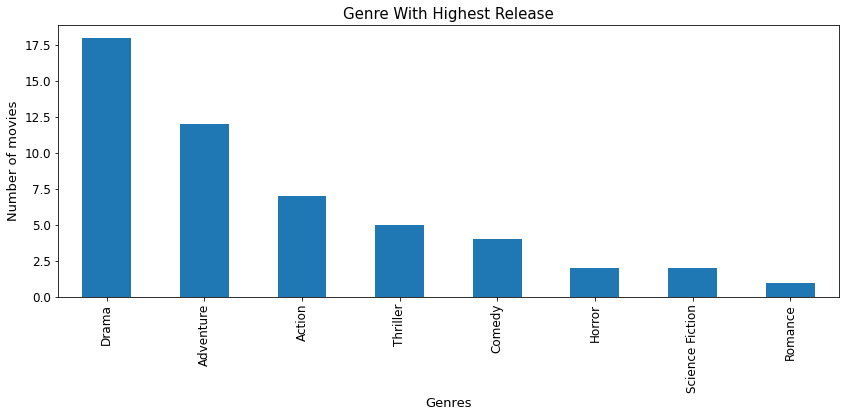

In [22]:
#plot a 'bar' plot using plot function for 'genre vs number of movies'.
popular_produced.plot(kind= 'bar',figsize = (14,5),fontsize=12)
#setup the title and the labels of the plot.
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Genres',fontsize=13)
plt.ylabel("Number of movies",fontsize= 13)

>As you can see the Drama genre was the most produced 

In [23]:
popular_voted=df_most_popular['popular_voted_gerne'].value_counts()
popular_voted

Adventure      14
Drama           6
Action          4
Romance         4
Documentary     4
Fantasy         3
Animation       3
Comedy          2
Horror          2
Family          2
Crime           2
Thriller        1
Mystery         1
War             1
History         1
Western         1
Name: popular_voted_gerne, dtype: int64

Text(0, 0.5, 'Number of movies')

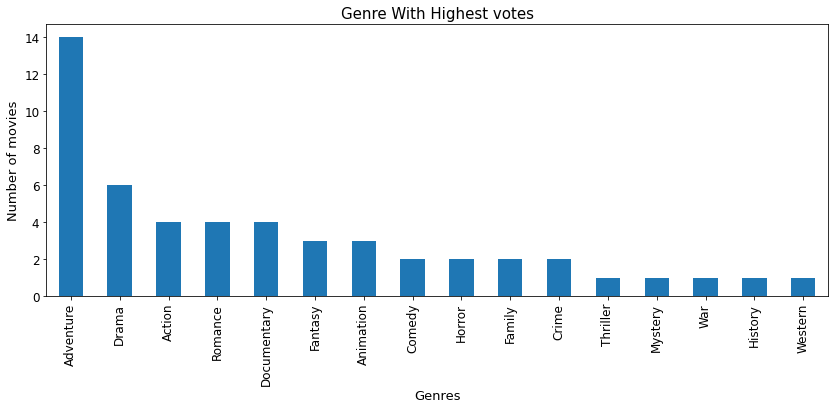

In [24]:
#plot a 'bar' plot using plot function for 'genre vs number of movies'.
popular_voted.plot(kind= 'bar',figsize = (14,5),fontsize=12)
#setup the title and the labels of the plot.
plt.title("Genre With Highest votes",fontsize=15)
plt.xlabel('Genres',fontsize=13)
plt.ylabel("Number of movies",fontsize= 13)

> Adventure was voted the most than other gerne

### Research Question 2: Which year has the highest release of movies?

In [25]:
#count the number of movies in each year 
most_movies=df.groupby('release_year').count()['id']

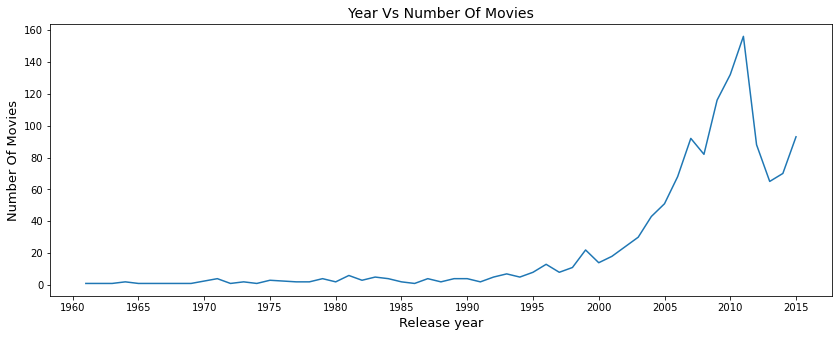

In [26]:
most_movies.plot(xticks = np.arange(1960,2016,5), figsize=(14,5));
plt.title("Year Vs Number Of Movies",fontsize = 14);
plt.xlabel('Release year',fontsize = 13);
plt.ylabel('Number Of Movies',fontsize = 13);

> From the sample of data we used 2014 year has the highest release of movies followed by year 2013 and year 2015.

### Research Question 3: Did movies with higher vote count received a better rating?

In [27]:
#Slice DataFrame to get 2 columns 'vote_count' and 'vote_average'
df_vote = df.loc[:, 'vote_count' : 'vote_average']
#To compare results entries are considered with more than 2000 votes
df_vote_2000 = df_vote[df_vote['vote_count'] > 2000]


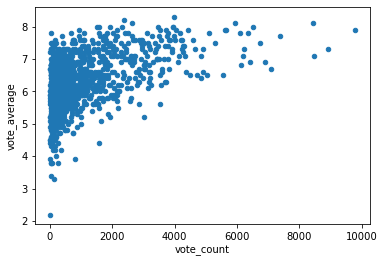

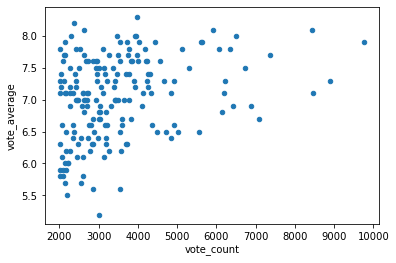

In [28]:
df_vote.plot(x='vote_count', y='vote_average', kind='scatter');
df_vote_2000.plot(x='vote_count', y='vote_average', kind='scatter');

In [29]:
df_vote.corr()

,vote_count,vote_average
vote_count,1.000000,0.464812
vote_average,0.464812,1.000000


In [30]:
 df_vote_2000.corr()

,vote_count,vote_average
vote_count,1.000000,0.305343
vote_average,0.305343,1.000000


### Q4.  What is the difference between the distribution of movies revenues and budget from year to year?

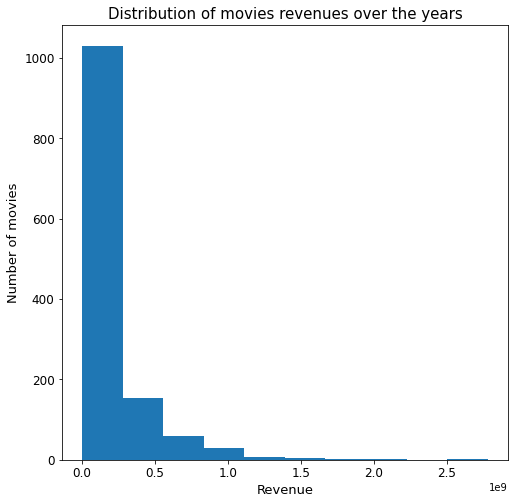

In [35]:
#for the revenue
df.revenue.plot(kind= 'hist',figsize = (8,8),fontsize=12)
#setup the title and the labels of the plot.
plt.title("Distribution of movies revenues over the years",fontsize=15)
plt.xlabel('Revenue',fontsize=13)
plt.ylabel("Number of movies",fontsize= 13);

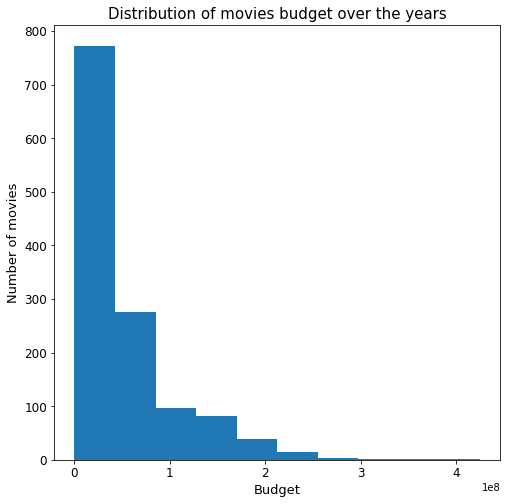

In [37]:
#for the budget
df.budget.plot(kind= 'hist',figsize = (8,8),fontsize=12)
#setup the title and the labels of the plot.
plt.title("Distribution of movies budget over the years",fontsize=15)
plt.xlabel('Budget',fontsize=13)
plt.ylabel("Number of movies",fontsize= 13);

> Looking at the above figures, we can see that as the budget was higher also the revenue was higher for the movies in our data.

<a id='conclusions'></a>
## Conclusions


### Q1 "Which genres are most popular from year to year?"

>As shown surprising results, as the most popular genre differed a lot. To the authors surprise, only in 11 occasions best genre by the users was also voted as the most frequent produced genres. In all remaining 40 occasions the two values differed.

### Q2 "Which year has the highest release of movies?"

> From the sample of data we used 2014 year has the highest release of movies followed by year 2013 and year 2015.
> I also noticed that there was asignificant drop, one in late 2000s to 2010 and another one around 2015.

### Q3"Did movies with higher vote count received a better rating? "

> Does not indicate that movies with a higher vote_count receive a higher vote_average. Also by considering columns with more than 2000 vote_count does not change the impression. Furthermore, the correlation does not indicate that higher vote counts result in higher vote averages.

> Also the Drama was mostlty produced and adventure was mostly voted for.

### Q4. What is the difference between the distribution of movies revenues and budget from year to year?
>The visualisatin shows that the revenue becomes higher when the budget is high in general.

## Limitation
> I can't assure thet the data I used is full or up to date, some corrumns are not specific for example the budget and the revenue doesn't have currency. Also consider that the data has a lot of missing values which might affect this Analysis.

